In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [173]:
data=pd.read_excel('D:\\FreightTigerTask\\data\\AI ML Internship Training Data.xlsx') #We can replace it with a url if the data is online, e:g using google sheets or s3 bucket

In [174]:
df=pd.DataFrame(data)   

### Exploratory Data Analysis

In [176]:
df.describe()   #to get the statistical summary of the data

,Shipment Date,Planned Delivery Date,Actual Delivery Date,Distance (km)
count,20000,20000,20000,20000.000000
mean,2023-09-16 08:39:28.800000,2023-09-19 15:07:24.960000256,2023-09-21 13:34:45.120000,1101.663750
min,2023-01-01 00:00:00,2023-01-02 00:00:00,2023-01-02 00:00:00,200.000000
25%,2023-05-09 00:00:00,2023-05-13 00:00:00,2023-05-15 00:00:00,649.750000
50%,2023-09-16 00:00:00,2023-09-20 00:00:00,2023-09-21 00:00:00,1102.000000
75%,2024-01-25 00:00:00,2024-01-29 00:00:00,2024-01-31 00:00:00,1551.000000
max,2024-06-01 00:00:00,2024-06-08 00:00:00,2024-06-12 00:00:00,2000.000000
std,NaN,NaN,NaN,520.717873


In [177]:
df.info()  #to get the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


##### Null values present in the data

In [178]:
df.isnull().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [179]:
df['Origin'].unique()

array(['Jaipur', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai', 'Kolkata',
       'Lucknow', 'Delhi', 'Ahmedabad', 'Pune'], dtype=object)

### Handling null values in 'Vehicle Type' column

In [180]:
df['Vehicle Type'].value_counts()

Vehicle Type
Lorry        4878
Truck        4860
Trailer      4838
Container    4827
Name: count, dtype: int64

In [181]:
df['Vehicle Type'].isnull().sum()

597

In [182]:
df_vehicle_lorry=df[df['Vehicle Type']=="Lorry"]
df_vehicle_truck=df[df['Vehicle Type']=="Truck"]
df_vehicle_container=df[df['Vehicle Type']=="Container"]    
df_vehicle_trailer=df[df['Vehicle Type']=="Trailer"]

In [183]:
print(min(df_vehicle_lorry['Distance (km)']))
print(max(df_vehicle_lorry['Distance (km)']))

200
2000


In [184]:
print(min(df_vehicle_container['Distance (km)']))
print(max(df_vehicle_container['Distance (km)']))

200
2000


In [185]:
print(min(df_vehicle_trailer['Distance (km)']))
print(max(df_vehicle_trailer['Distance (km)']))

200
2000


In [186]:
print(min(df_vehicle_truck['Distance (km)']))
print(max(df_vehicle_truck['Distance (km)']))

200
2000


- This confirms that the vehicle used for transportation does not depend upon distance between 'origin' and 'destination'

In [187]:
import pandas as pd
from itertools import permutations

def find_most_used_transport(destinations, df):
    destination_pairs = list(permutations(destinations, 2))
    result = {}
    
    for source, destination in destination_pairs:
        pair_data = df[(df['Origin'] == source) & (df['Destination'] == destination)]
        
        if not pair_data.empty:
            most_used = pair_data['Vehicle Type'].value_counts().idxmax()
            result[(source, destination)] = most_used
        else:
            result[(source, destination)] = None  
    
    return result

destinations = ['Jaipur', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai', 'Kolkata', 
                'Lucknow', 'Delhi', 'Ahmedabad', 'Pune']

result = find_most_used_transport(destinations, df)

# Display the result
for pair, vehicle in result.items():
    print(f"{pair}: {vehicle}")


('Jaipur', 'Bangalore'): Truck
('Jaipur', 'Mumbai'): Trailer
('Jaipur', 'Hyderabad'): Trailer
('Jaipur', 'Chennai'): Container
('Jaipur', 'Kolkata'): Trailer
('Jaipur', 'Lucknow'): Trailer
('Jaipur', 'Delhi'): Truck
('Jaipur', 'Ahmedabad'): Lorry
('Jaipur', 'Pune'): Truck
('Bangalore', 'Jaipur'): Truck
('Bangalore', 'Mumbai'): Container
('Bangalore', 'Hyderabad'): Lorry
('Bangalore', 'Chennai'): Truck
('Bangalore', 'Kolkata'): Container
('Bangalore', 'Lucknow'): Truck
('Bangalore', 'Delhi'): Lorry
('Bangalore', 'Ahmedabad'): Truck
('Bangalore', 'Pune'): Lorry
('Mumbai', 'Jaipur'): Truck
('Mumbai', 'Bangalore'): Trailer
('Mumbai', 'Hyderabad'): Trailer
('Mumbai', 'Chennai'): Lorry
('Mumbai', 'Kolkata'): Truck
('Mumbai', 'Lucknow'): Truck
('Mumbai', 'Delhi'): Trailer
('Mumbai', 'Ahmedabad'): Container
('Mumbai', 'Pune'): Lorry
('Hyderabad', 'Jaipur'): Trailer
('Hyderabad', 'Bangalore'): Truck
('Hyderabad', 'Mumbai'): Trailer
('Hyderabad', 'Chennai'): Trailer
('Hyderabad', 'Kolkata'): Tra

In [188]:
for index, row in df.iterrows():
        if pd.isna(row['Vehicle Type']):  
            source = row['Origin']
            destination = row['Destination']
            # Fetch the most used vehicle type for the (Source, Destination) pair
            most_used = result.get((source, destination))
            # Fill the NaN value if most used vehicle type is found
            if most_used:
                df.at[index, 'Vehicle Type'] = most_used

In [189]:
df.isnull().sum()

Shipment ID              0
Origin                   0
Destination              0
Shipment Date            0
Planned Delivery Date    0
Actual Delivery Date     0
Vehicle Type             0
Distance (km)            0
Weather Conditions       0
Traffic Conditions       0
Delayed                  0
dtype: int64

In [190]:
df['Vehicle Type'].value_counts()

Vehicle Type
Lorry        5048
Truck        5029
Container    4967
Trailer      4956
Name: count, dtype: int64

<Axes: xlabel='Vehicle Type', ylabel='count'>

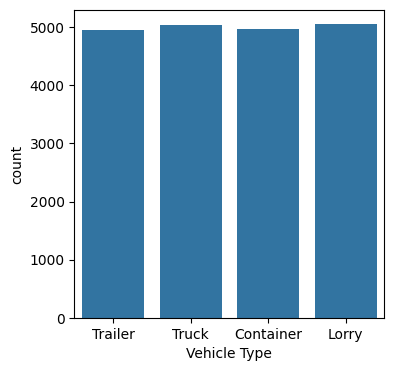

In [191]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x='Vehicle Type', data=df)

##### Above results in an *almost* even distribution between vehicles

###  Univariate analysis
- Origin Column

In [192]:
df['Origin'].unique()

array(['Jaipur', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai', 'Kolkata',
       'Lucknow', 'Delhi', 'Ahmedabad', 'Pune'], dtype=object)

In [193]:
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x20186085210>,
 [Text(-0.3590869191375756, 1.039738709726768, 'Jaipur'),
  Text(-0.9205248502103587, 0.6021909997211823, 'Bangalore'),
  Text(-1.0974566205340754, -0.07475938767757821, 'Mumbai'),
  Text(-0.8357728766071085, -0.7151808853205454, 'Hyderabad'),
  Text(-0.254268980240592, -1.070208991593422, 'Chennai'),
  Text(0.4163180042738502, -1.0181745033723044, 'Kolkata'),
  Text(0.9308840844611854, -0.586050186670784, 'Lucknow'),
  Text(1.0981326428060043, 0.06406792336185888, 'Delhi'),
  Text(0.8620270146380578, 0.6833077096259035, 'Ahmedabad'),
  Text(0.32426996463024615, 1.051117971513521, 'Pune')],
 [Text(-0.1958655922568594, 0.5671302053055098, '10.6'),
  Text(-0.5021044637511046, 0.3284678180297358, '10.4'),
  Text(-0.5986127021094956, -0.040777847824133566, '10.2'),
  Text(-0.4558761145129682, -0.39009866472029747, '10.1'),
  Text(-0.1386921710403229, -0.5837503590509575, '9.9'),
  Text(0.22708254778573644, -0.5553679109303478, '9.9'),
  Text(0

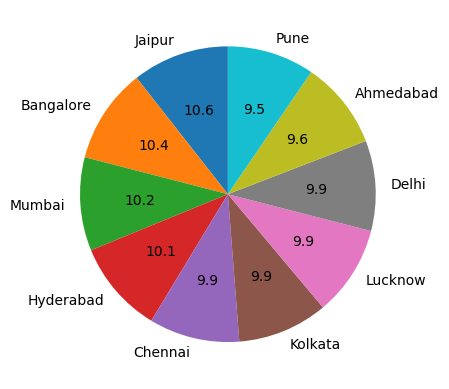

In [194]:
plt.pie(df['Origin'].value_counts(), labels=df['Origin'].unique(),autopct='%.1f', startangle=90)

In [195]:
df['Origin'].value_counts()


Origin
Pune         2117
Mumbai       2078
Delhi        2043
Bangalore    2030
Chennai      1979
Hyderabad    1977
Ahmedabad    1975
Kolkata      1973
Lucknow      1923
Jaipur       1905
Name: count, dtype: int64

### Destination

In [196]:
df['Destination'].unique()

array(['Mumbai', 'Delhi', 'Chennai', 'Ahmedabad', 'Kolkata', 'Lucknow',
       'Bangalore', 'Pune', 'Jaipur', 'Hyderabad'], dtype=object)

In [197]:
df['Destination'].value_counts()

Destination
Jaipur       2044
Chennai      2042
Bangalore    2032
Lucknow      2028
Ahmedabad    2012
Pune         1989
Delhi        1982
Mumbai       1976
Hyderabad    1953
Kolkata      1942
Name: count, dtype: int64

- We can confidently say that maximum deliveries start from 'Pune' and maximum goods are transported to 'Jaipur'
- We can confidently say that least number of deliveries start from *Jaipur* and *Kolkata* has least incoming deliveries.

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\1597622708.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Destination', data=df,palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Ahmedabad'),
  Text(4, 0, 'Kolkata'),
  Text(5, 0, 'Lucknow'),
  Text(6, 0, 'Bangalore'),
  Text(7, 0, 'Pune'),
  Text(8, 0, 'Jaipur'),
  Text(9, 0, 'Hyderabad')])

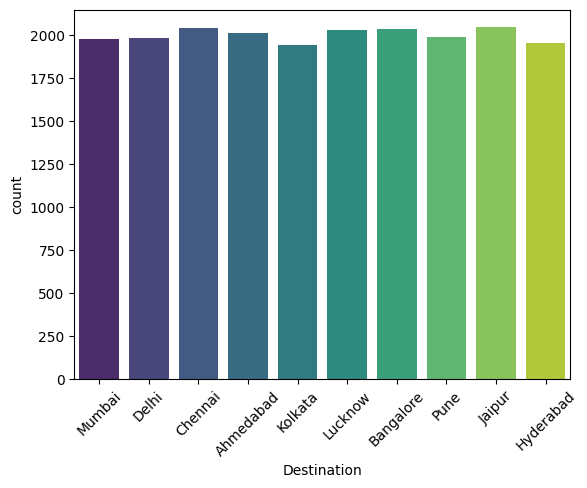

In [198]:
sns.countplot(x='Destination', data=df,palette='viridis')
plt.xticks(rotation=45)

In [199]:
df.columns

Index(['Shipment ID', 'Origin', 'Destination', 'Shipment Date',
       'Planned Delivery Date', 'Actual Delivery Date', 'Vehicle Type',
       'Distance (km)', 'Weather Conditions', 'Traffic Conditions', 'Delayed'],
      dtype='object')

### Distance Column

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\1925555485.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Distance (km)'],kde=True,bins=30, color='red',palette='viridis')


<Axes: xlabel='Distance (km)', ylabel='Count'>

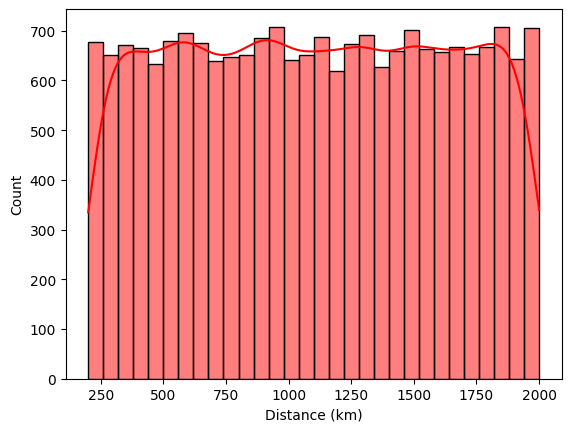

In [200]:
sns.histplot(df['Distance (km)'],kde=True,bins=30, color='red',palette='viridis')

In [201]:
least_distance=min(df['Distance (km)'])
max_distance=max(df['Distance (km)'])
print("Least Distance:",least_distance)
print("Max Distance:",max_distance)

Least Distance: 200
Max Distance: 2000


- From here we can infer that no deliveries have been performed for less than *200 kms* and more than *2000 kms*

#### Weather Conditions

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\1480220072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Conditions', data=df,palette='viridis')


<Axes: xlabel='Weather Conditions', ylabel='count'>

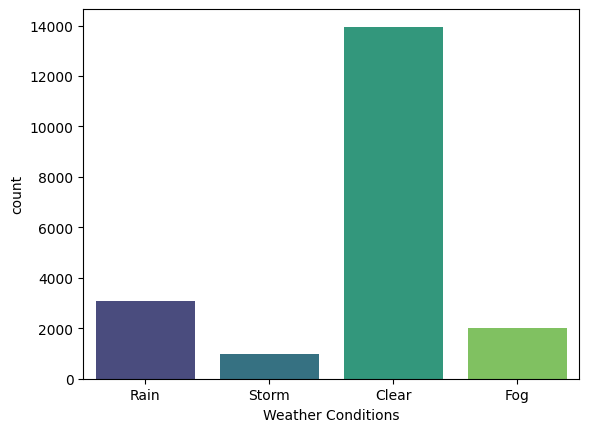

In [202]:
sns.countplot(x='Weather Conditions', data=df,palette='viridis')

In [203]:
df[(df['Weather Conditions']=='Rain') & (df['Delayed']=='No')] 

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed


- This shows that packages have never been delivered in Rainy weather conditions

In [205]:
df[(df['Weather Conditions']=='Fog') & (df['Delayed']=='No')] 

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed


- This shows that packages are not on time in *Fog* conditions

In [209]:
df[(df['Weather Conditions']=='Storm') & (df['Delayed']=='No')] 

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed


- This shows packages are never on time in *Stormy Conditions*

In [214]:
df[(df['Weather Conditions']=='Clear') & (df['Delayed']=='Yes')].shape[0]

8709

In [215]:
df[(df['Weather Conditions']=='Rain') & (df['Delayed']=='Yes')].shape[0]

3067

In [216]:
df[(df['Weather Conditions']=='Fog') & (df['Delayed']=='Yes')].shape[0]

2014

In [217]:
df[(df['Weather Conditions']=='Storm') & (df['Delayed']=='Yes')].shape[0]

967

- This can prove one thing that here when weather conditions are *Clear* the package is more likely to be *Delayed*

### Traffic Conditions 

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\2952696407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Conditions', data=df,palette='viridis')


<Axes: xlabel='Traffic Conditions', ylabel='count'>

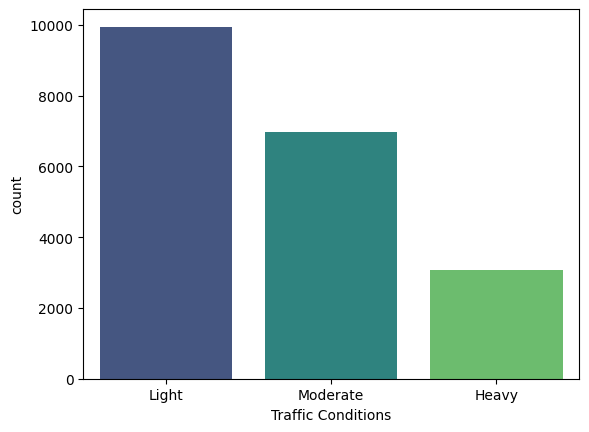

In [32]:
sns.countplot(x='Traffic Conditions', data=df,palette='viridis')

#### Delayed Column
 - It clearly indicates a class imbalance

In [33]:
df['Delayed'].value_counts()

Delayed
Yes    14757
No      5243
Name: count, dtype: int64

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\4009106053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delayed', data=df,palette='viridis')


<Axes: xlabel='Delayed', ylabel='count'>

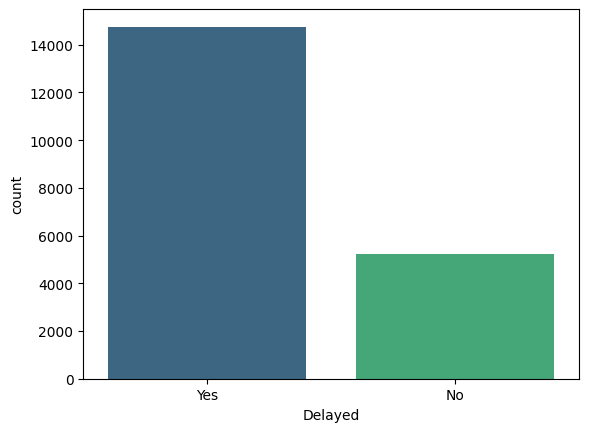

In [34]:
sns.countplot(x='Delayed', data=df,palette='viridis')

### Bivariate Analysis

- Delay Vs Origin 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jaipur'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Kolkata'),
  Text(6, 0, 'Lucknow'),
  Text(7, 0, 'Delhi'),
  Text(8, 0, 'Ahmedabad'),
  Text(9, 0, 'Pune')])

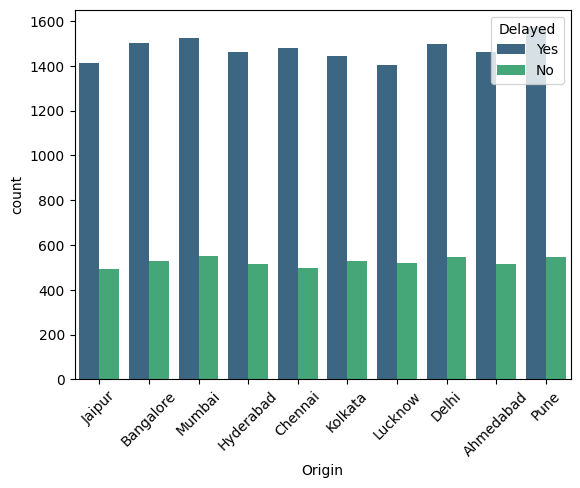

In [35]:
sns.countplot(x='Origin', data=df,hue='Delayed',palette='viridis')
plt.xticks(rotation=45)

- Delay Vs Destination

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'Ahmedabad'),
  Text(4, 0, 'Kolkata'),
  Text(5, 0, 'Lucknow'),
  Text(6, 0, 'Bangalore'),
  Text(7, 0, 'Pune'),
  Text(8, 0, 'Jaipur'),
  Text(9, 0, 'Hyderabad')])

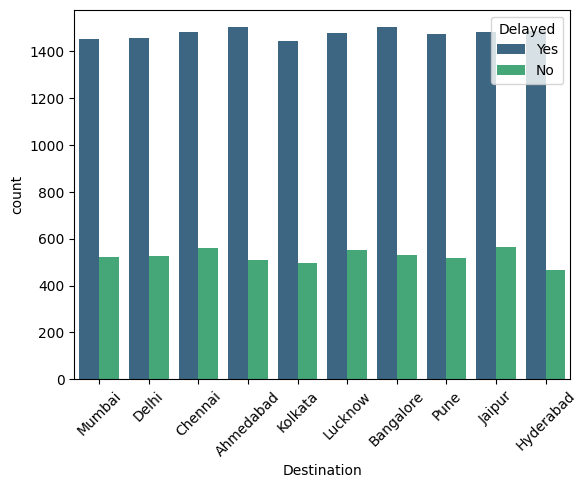

In [36]:
sns.countplot(x='Destination', data=df,hue='Delayed',palette='viridis')
plt.xticks(rotation=45)

- Delay Vs (Origin, Destination)

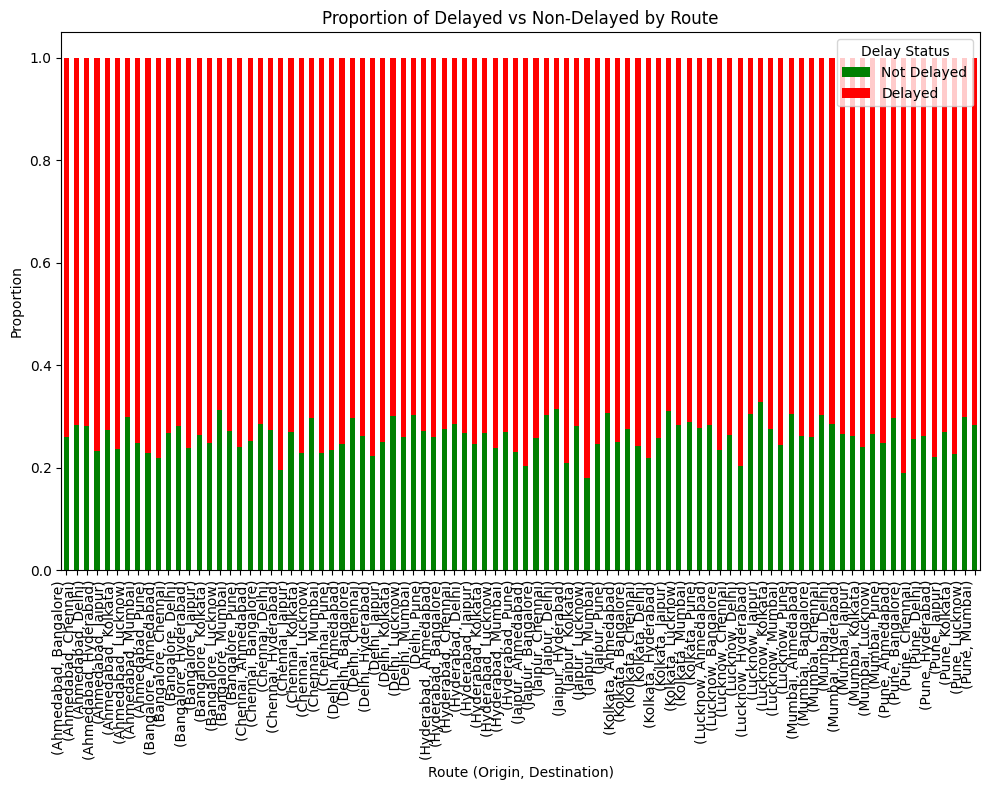

In [37]:
grouped = df.groupby(['Origin', 'Destination'])['Delayed'].value_counts(normalize=True).unstack().fillna(0)

#print(grouped)

grouped.plot(kind='bar', stacked=True, figsize=(10, 8), color=['green', 'red'])
plt.title('Proportion of Delayed vs Non-Delayed by Route')
plt.xlabel('Route (Origin, Destination)')
plt.ylabel('Proportion')
plt.legend(['Not Delayed', 'Delayed'], title='Delay Status')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Origin, Destination Vs Delay

In [59]:
max_delay = 0
min_delay=10000000000
max_delay_pair = None

for i in result.items():
    origin, destination = i[0][0], i[0][1]
    pair_data = df[(df['Origin']==origin)&(df['Destination']==destination)]
    
    delayed_count = pair_data['Delayed'].value_counts().get('Yes')
    ontime_count=pair_data['Delayed'].value_counts().get('No')
    
    # Check if this pair has the highest delay
    if delayed_count>max_delay:
        max_delay=delayed_count
        max_delay_pair=(origin, destination)
    if delayed_count<min_delay:
        min_delay=delayed_count
        min_delay_pair=(origin, destination)

# Print the pair with the maximum delay
print(f"The pair with the maximum delayed deliveries is {max_delay_pair} with {max_delay} delayed deliveries.")
print(f"The pair with the minimum delayed deliveries is {min_delay_pair} with {min_delay} delayed deliveries.")

    
    

The pair with the maximum delayed deliveries is ('Pune', 'Jaipur') with 192 delayed deliveries.
The pair with the minimum delayed deliveries is ('Lucknow', 'Pune') with 130 delayed deliveries.


In [246]:
df.columns

Index(['Shipment ID', 'Origin', 'Destination', 'Shipment Date',
       'Planned Delivery Date', 'Actual Delivery Date', 'Vehicle Type',
       'Distance (km)', 'Weather Conditions', 'Traffic Conditions', 'Delayed'],
      dtype='object')

### Date Vs Delay

In [247]:
df['temp'] = df['Shipment Date'].dt.strftime('%A')

In [248]:
df['temp' ].value_counts()

temp
Friday       2943
Tuesday      2882
Wednesday    2856
Thursday     2841
Saturday     2835
Monday       2832
Sunday       2811
Name: count, dtype: int64

- Max shipments are done on *Friday* and least shipments are done on *Sunday*

In [249]:
df['temp'] = df['Planned Delivery Date'].dt.strftime('%A')

In [250]:
df['temp' ].value_counts()

temp
Thursday     2896
Monday       2889
Wednesday    2881
Saturday     2870
Friday       2846
Tuesday      2823
Sunday       2795
Name: count, dtype: int64

- Planned delivery day is mostly *Thursday* 

In [251]:
df['temp'] = df['Actual Delivery Date'].dt.strftime('%A')

In [252]:
df['temp' ].value_counts()

temp
Tuesday      2905
Thursday     2876
Saturday     2873
Friday       2866
Monday       2831
Wednesday    2827
Sunday       2822
Name: count, dtype: int64

- The packages are being delivered *actually* on Tuesday mostly and least number of packages are delivered during *Sunday*


### Delay VS Day_Of_Week

In [253]:
df_filtered = df[(df['Delayed'] == 'Yes') & (df['temp'] == 'Sunday')]
df['Delayed' ].value_counts()

Delayed
Yes    14757
No      5243
Name: count, dtype: int64

### Vehicle Type VS Delay

<Axes: xlabel='Vehicle Type', ylabel='count'>

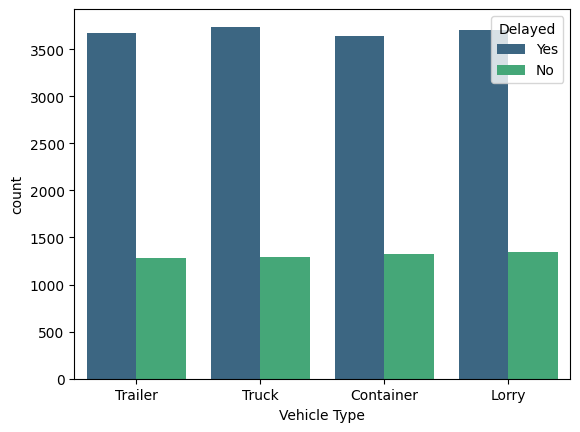

In [254]:
sns.countplot(x='Vehicle Type', data=df,hue='Delayed',palette='viridis')

#### Distance (Kms) VS Delay

C:\Users\aarus\AppData\Local\Temp\ipykernel_11728\4293103842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Delayed', y='Distance (km)', palette='Set2')


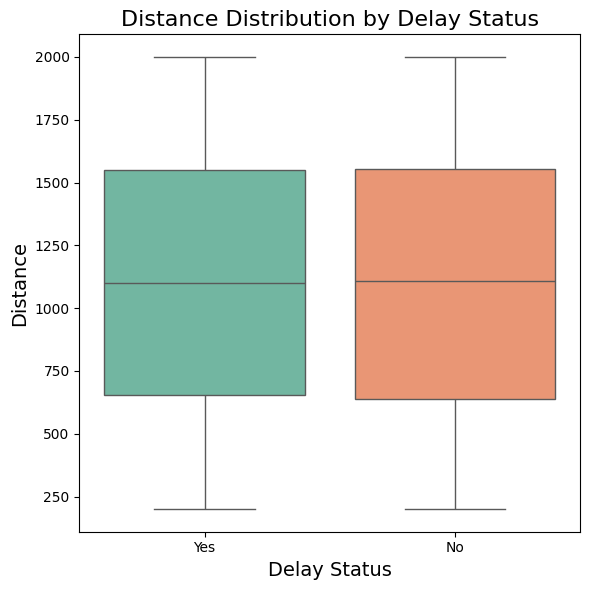

In [255]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Delayed', y='Distance (km)', palette='Set2')
plt.title('Distance Distribution by Delay Status', fontsize=16)
plt.xlabel('Delay Status', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.tight_layout()
plt.show()

## Delay does not depend upon the distance travelled by the vehicle as the distance distribution is almost same for both delayed and non-delayed vehicles.

### Delay According to weather and traffic conditions

In [256]:
import itertools

traffic_conditions = ['Heavy', 'Moderate', 'Light']
weather_conditions = ['Clear', 'Storm', 'Fog', 'Rain']

combinations = list(itertools.product(traffic_conditions, weather_conditions))

# Print all combinations
for traffic, weather in combinations:
    print(f"Traffic: {traffic}, Weather: {weather}")


Traffic: Heavy, Weather: Clear
Traffic: Heavy, Weather: Storm
Traffic: Heavy, Weather: Fog
Traffic: Heavy, Weather: Rain
Traffic: Moderate, Weather: Clear
Traffic: Moderate, Weather: Storm
Traffic: Moderate, Weather: Fog
Traffic: Moderate, Weather: Rain
Traffic: Light, Weather: Clear
Traffic: Light, Weather: Storm
Traffic: Light, Weather: Fog
Traffic: Light, Weather: Rain


In [257]:

results = []

for traffic, weather in combinations:
    count = df[
        (df['Traffic Conditions'] == traffic) & 
        (df['Weather Conditions'] == weather) & 
        (df['Delayed'] == 'Yes')
    ].shape[0]
    results.append({'Traffic': traffic, 'Weather': weather, 'Delay_Count': count})

results_df = pd.DataFrame(results)
results_df.sort_values(by='Delay_Count', ascending=False)


,Traffic,Weather,Delay_Count
4,Moderate,Clear,4841
0,Heavy,Clear,2185
8,Light,Clear,1683
11,Light,Rain,1535
7,Moderate,Rain,1074
10,Light,Fog,1014
6,Moderate,Fog,714
9,Light,Storm,475
3,Heavy,Rain,458
5,Moderate,Storm,349


- This clearly shows that packages are more likely to get delayed when conditions are *Clear*

In [258]:
df['Traffic Conditions'].value_counts()

Traffic Conditions
Light       9950
Moderate    6978
Heavy       3072
Name: count, dtype: int64

#### Average days for delivery

In [259]:
np.mean(df['Actual Delivery Date']-df['Shipment Date'])

Timedelta('5 days 04:55:16.320000')

#### Average promised delivery days

In [260]:
np.mean(df['Planned Delivery Date']-df['Shipment Date'])

Timedelta('3 days 06:27:56.160000')

- #### There is a roughly 3 day's gap between actual delivered package and promised delivery of the package

In [261]:
df.columns

Index(['Shipment ID', 'Origin', 'Destination', 'Shipment Date',
       'Planned Delivery Date', 'Actual Delivery Date', 'Vehicle Type',
       'Distance (km)', 'Weather Conditions', 'Traffic Conditions', 'Delayed',
       'temp'],
      dtype='object')

## Feature Engineering
1. We could make a column according to distance:
    - *500Kms* short distance
    - *More than 500 kms and less than 1000 kms* medium
    - *More than 1000kms* large

In [263]:
df_new = df.copy()

In [264]:
df_new['Distance Type'] = np.where(df_new['Distance (km)'] < 500, 'Short', np.where(df_new['Distance (km)'] <= 1000, 'Medium', 'Large'))

In [265]:
df_new['Distance Type'].value_counts()

Distance Type
Large     11101
Medium     5601
Short      3298
Name: count, dtype: int64

<Axes: xlabel='Distance Type', ylabel='count'>

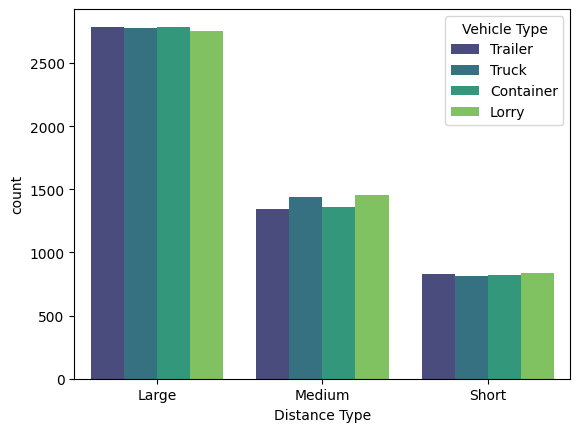

In [266]:
sns.countplot(x='Distance Type', hue='Vehicle Type',data=df_new,palette='viridis')

- We can infer that all types of vehicles are being used for all kinds of transport

In [267]:
type(df_new['Planned Delivery Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [268]:
def calculate_days_from_timestamps(df, timestamp1, timestamp2):
    return (df[timestamp1] - df[timestamp2]).dt.days
df_new['Planned Delivery (in days)'] = calculate_days_from_timestamps(df_new, 'Planned Delivery Date', 'Shipment Date')

In [269]:
df_new.head(10)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,temp,Distance Type,Planned Delivery (in days)
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,Tuesday,Large,5
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,Friday,Large,4
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,Monday,Large,6
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,Wednesday,Large,4
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,Tuesday,Medium,2
5,SHIP000005,Chennai,Ahmedabad,2024-03-14,2024-03-16,2024-03-19,Container,746,Storm,Light,Yes,Tuesday,Medium,2
6,SHIP000006,Bangalore,Lucknow,2024-05-28,2024-06-03,2024-06-10,Lorry,1988,Fog,Light,Yes,Monday,Large,6
7,SHIP000007,Kolkata,Mumbai,2023-04-01,2023-04-06,2023-04-08,Container,1521,Rain,Moderate,Yes,Saturday,Large,5
8,SHIP000008,Kolkata,Bangalore,2023-10-01,2023-10-02,2023-10-03,Truck,390,Rain,Light,Yes,Tuesday,Short,1
9,SHIP000009,Lucknow,Ahmedabad,2023-03-08,2023-03-09,2023-03-09,Trailer,324,Clear,Light,No,Thursday,Short,1


In [270]:
df_new

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,temp,Distance Type,Planned Delivery (in days)
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,Tuesday,Large,5
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,Friday,Large,4
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,Monday,Large,6
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,Wednesday,Large,4
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,Tuesday,Medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes,Monday,Medium,1
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes,Tuesday,Short,1
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes,Friday,Large,3
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes,Monday,Medium,3


### Origin-Destination Pairs

In [271]:
df_new['Origin_Destination'] = df_new['Origin'] + '-' + df_new['Destination']

In [272]:
df_new['Origin_Destination'].value_counts()

Origin_Destination
Pune-Jaipur            263
Pune-Delhi             245
Hyderabad-Ahmedabad    242
Delhi-Hyderabad        242
Delhi-Pune             242
                      ... 
Lucknow-Ahmedabad      197
Hyderabad-Mumbai       193
Jaipur-Ahmedabad       192
Lucknow-Pune           187
Jaipur-Hyderabad       176
Name: count, Length: 90, dtype: int64

- The above makes data very high dimensional therefore, we just drop Origin and Destination

In [273]:
df_new.head(5)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,temp,Distance Type,Planned Delivery (in days),Origin_Destination
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,Tuesday,Large,5,Jaipur-Mumbai
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,Friday,Large,4,Bangalore-Delhi
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,Monday,Large,6,Mumbai-Chennai
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,Wednesday,Large,4,Hyderabad-Ahmedabad
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,Tuesday,Medium,2,Chennai-Kolkata


In [274]:
df_new['Delayed'].value_counts()  #We have to handle the class imbalance problem

Delayed
Yes    14757
No      5243
Name: count, dtype: int64

#### Using SMOTE to handle class imbalance
- It creates synthetic data points for under represented class

In [161]:
pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [162]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


#### Creating a *M_W_F* and *T_T_S* and *Sunday* feature 

In [275]:
df_new['M_W_F']=np.where(df_new['temp'].isin(['Monday','Wednesday','Friday']),1,0)
df_new['T_T_S']=np.where(df_new['temp'].isin(['Tuesday','Thursday','Saturday']),1,0)
df_new['Sunday']=np.where(df_new['temp'].isin(['Sunday']),1,0)

In [276]:
df_new

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,temp,Distance Type,Planned Delivery (in days),Origin_Destination,M_W_F,T_T_S,Sunday
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,Tuesday,Large,5,Jaipur-Mumbai,0,1,0
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,Friday,Large,4,Bangalore-Delhi,1,0,0
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,Monday,Large,6,Mumbai-Chennai,1,0,0
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,Wednesday,Large,4,Hyderabad-Ahmedabad,1,0,0
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,Tuesday,Medium,2,Chennai-Kolkata,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes,Monday,Medium,1,Chennai-Bangalore,1,0,0
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes,Tuesday,Short,1,Hyderabad-Jaipur,0,1,0
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes,Friday,Large,3,Hyderabad-Mumbai,1,0,0
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes,Monday,Medium,3,Ahmedabad-Chennai,1,0,0


In [277]:
df_new=df_new.drop(columns=['Origin','Destination','Shipment ID','Shipment Date','Planned Delivery Date','Actual Delivery Date','temp','Origin_Destination','Distance (km)'])

In [278]:
df_new

,Vehicle Type,Weather Conditions,Traffic Conditions,Delayed,Distance Type,Planned Delivery (in days),M_W_F,T_T_S,Sunday
0,Trailer,Rain,Light,Yes,Large,5,0,1,0
1,Trailer,Storm,Moderate,Yes,Large,4,1,0,0
2,Truck,Clear,Light,No,Large,6,1,0,0
3,Container,Clear,Light,No,Large,4,1,0,0
4,Container,Clear,Heavy,Yes,Medium,2,0,1,0
...,...,...,...,...,...,...,...,...,...
19995,Truck,Fog,Moderate,Yes,Medium,1,1,0,0
19996,Truck,Storm,Moderate,Yes,Short,1,0,1,0
19997,Trailer,Rain,Moderate,Yes,Large,3,1,0,0
19998,Lorry,Fog,Moderate,Yes,Medium,3,1,0,0


### Creating a category for Weather Conditions called 'Clear' or 'Not clear'

In [282]:
df_new['Clear Weather']=np.where(df_new['Weather Conditions']=='Clear',1,0)
df_new['Disturbed Weather']=np.where(df_new['Weather Conditions'].isin(['Rain','Fog','Storm']),1,0)

In [283]:
df_new.sample()

,Vehicle Type,Weather Conditions,Traffic Conditions,Delayed,Distance Type,Planned Delivery (in days),M_W_F,T_T_S,Sunday,Clear Weather,Disturbed Weather
17659,Trailer,Clear,Light,No,Short,1,1,0,0,1,0


In [284]:
df_encoded = pd.get_dummies(df_new, columns=['Vehicle Type', 'Traffic Conditions','Distance Type'])
df_encoded.head()

,Weather Conditions,Delayed,Planned Delivery (in days),M_W_F,T_T_S,Sunday,Clear Weather,Disturbed Weather,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Distance Type_Large,Distance Type_Medium,Distance Type_Short
0,Rain,Yes,5,0,1,0,0,1,False,False,True,False,False,True,False,True,False,False
1,Storm,Yes,4,1,0,0,0,1,False,False,True,False,False,False,True,True,False,False
2,Clear,No,6,1,0,0,1,0,False,False,False,True,False,True,False,True,False,False
3,Clear,No,4,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False
4,Clear,Yes,2,0,1,0,1,0,True,False,False,False,True,False,False,False,True,False


In [285]:
df_encoded=df_encoded.drop(columns=['Weather Conditions'])
df_encoded.head()

,Delayed,Planned Delivery (in days),M_W_F,T_T_S,Sunday,Clear Weather,Disturbed Weather,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Distance Type_Large,Distance Type_Medium,Distance Type_Short
0,Yes,5,0,1,0,0,1,False,False,True,False,False,True,False,True,False,False
1,Yes,4,1,0,0,0,1,False,False,True,False,False,False,True,True,False,False
2,No,6,1,0,0,1,0,False,False,False,True,False,True,False,True,False,False
3,No,4,1,0,0,1,0,True,False,False,False,False,True,False,True,False,False
4,Yes,2,0,1,0,1,0,True,False,False,False,True,False,False,False,True,False


In [286]:
df_encoded['Delayed']=np.where(df_encoded['Delayed']=='Yes',1,0)
df_encoded=df_encoded.replace({True:1,False:0})

In [287]:
df_encoded.head()

,Delayed,Planned Delivery (in days),M_W_F,T_T_S,Sunday,Clear Weather,Disturbed Weather,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Distance Type_Large,Distance Type_Medium,Distance Type_Short
0,1,5,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,1,4,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
2,0,6,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0
3,0,4,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,2,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0


In [288]:
X=df_encoded.drop(columns=['Delayed'])
Y=df_encoded['Delayed']

### Using SMOTE now

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [290]:
X_resampled.shape

(23632, 16)

In [291]:
y_resampled.value_counts()

Delayed
1    11816
0    11816
Name: count, dtype: int64

In [292]:
X_resampled.head()

,Planned Delivery (in days),M_W_F,T_T_S,Sunday,Clear Weather,Disturbed Weather,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Distance Type_Large,Distance Type_Medium,Distance Type_Short
0,4,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,4,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,5,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
3,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
4,3,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0


In [293]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23632 entries, 0 to 23631
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Planned Delivery (in days)   23632 non-null  int64
 1   M_W_F                        23632 non-null  int32
 2   T_T_S                        23632 non-null  int32
 3   Sunday                       23632 non-null  int32
 4   Clear Weather                23632 non-null  int32
 5   Disturbed Weather            23632 non-null  int32
 6   Vehicle Type_Container       23632 non-null  int64
 7   Vehicle Type_Lorry           23632 non-null  int64
 8   Vehicle Type_Trailer         23632 non-null  int64
 9   Vehicle Type_Truck           23632 non-null  int64
 10  Traffic Conditions_Heavy     23632 non-null  int64
 11  Traffic Conditions_Light     23632 non-null  int64
 12  Traffic Conditions_Moderate  23632 non-null  int64
 13  Distance Type_Large          23632 non-null  i

In [294]:
pip install scikit-learn==1.3.1


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [296]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

predictions = tree.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions))
print("Classification Report:\n", classification_report(Y_test, predictions))

Accuracy: 0.9464776814046965
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2416
           1       1.00      0.89      0.94      2311

    accuracy                           0.95      4727
   macro avg       0.95      0.95      0.95      4727
weighted avg       0.95      0.95      0.95      4727



In [297]:
from sklearn.metrics import accuracy_score

# Predict on the training set
train_predictions = tree.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)

# Predict on the testing set
test_predictions = tree.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 94.41%
Testing Accuracy: 94.65%


In [298]:
!pip install graphviz==0.20.1

Defaulting to user installation because normal site-packages is not writeable


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [299]:
from sklearn.tree import export_graphviz
import graphviz

In [302]:
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

In [304]:
graph = graphviz.Source(dot_data)  #Config error everything works file on collab (Trust me  :)  )
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [305]:
import pickle
pickle.dump(tree, open('model.pkl', 'wb'))

In [306]:
import os
print(os.path.getsize('model.pkl'))

17790


In [324]:
X.columns

Index(['Planned Delivery (in days)', 'M_W_F', 'T_T_S', 'Sunday',
       'Clear Weather', 'Disturbed Weather', 'Vehicle Type_Container',
       'Vehicle Type_Lorry', 'Vehicle Type_Trailer', 'Vehicle Type_Truck',
       'Traffic Conditions_Heavy', 'Traffic Conditions_Light',
       'Traffic Conditions_Moderate', 'Distance Type_Large',
       'Distance Type_Medium', 'Distance Type_Short'],
      dtype='object')

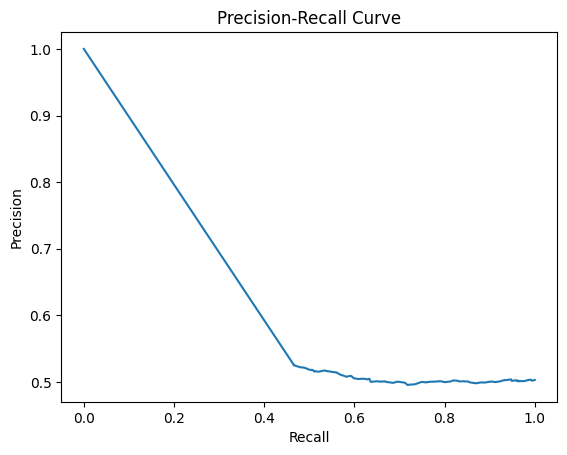

In [314]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, tree.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Undersampling

In [308]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [309]:
y_resampled.value_counts()  # Removed some data points for the majority class to balance the classes

Delayed
0    4184
1    4184
Name: count, dtype: int64

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions))
print("Classification Report:\n", classification_report(Y_test, predictions))

Accuracy: 0.522700119474313
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       832
           1       0.53      0.46      0.49       842

    accuracy                           0.52      1674
   macro avg       0.52      0.52      0.52      1674
weighted avg       0.52      0.52      0.52      1674



### Poor Accuracy

In [311]:
from sklearn.metrics import accuracy_score

# Predict on the training set
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_predictions)

# Predict on the testing set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 60.20%
Testing Accuracy: 52.27%


In [312]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print('ROC AUC:', roc_auc)

ROC AUC: 0.5182208398044947


In [336]:
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", auc_scores)
print("Mean ROC AUC score:", auc_scores.mean())

Cross-validated ROC AUC scores: [1.         1.         0.99940618 0.99881235 1.        ]
Mean ROC AUC score: 0.999643705463183


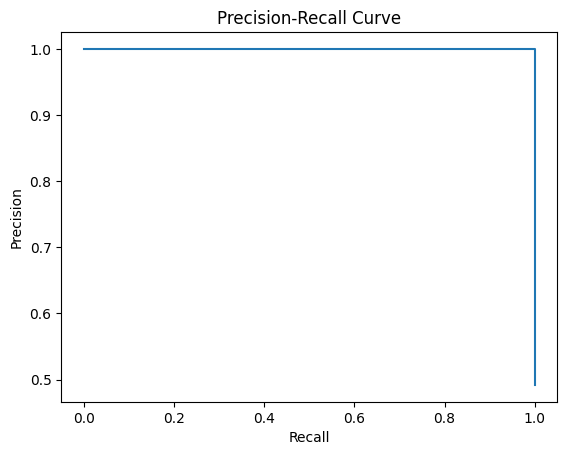

In [226]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Trying CatboostClassifier

In [315]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Train the model with categorical features specified
model_cat.fit(X_train, Y_train)

# Get the feature importance (optional)
feature_importances = model_cat.get_feature_importance()
print("Feature importances:", feature_importances)

0:	learn: 0.6929344	total: 143ms	remaining: 14.2s
1:	learn: 0.6923965	total: 147ms	remaining: 7.22s
2:	learn: 0.6921474	total: 151ms	remaining: 4.88s
3:	learn: 0.6920831	total: 154ms	remaining: 3.7s
4:	learn: 0.6920101	total: 158ms	remaining: 3s
5:	learn: 0.6916451	total: 161ms	remaining: 2.52s
6:	learn: 0.6912192	total: 165ms	remaining: 2.19s
7:	learn: 0.6908761	total: 169ms	remaining: 1.94s
8:	learn: 0.6904174	total: 172ms	remaining: 1.74s
9:	learn: 0.6900737	total: 176ms	remaining: 1.58s
10:	learn: 0.6899977	total: 180ms	remaining: 1.46s
11:	learn: 0.6898085	total: 184ms	remaining: 1.35s
12:	learn: 0.6895198	total: 188ms	remaining: 1.25s
13:	learn: 0.6893922	total: 192ms	remaining: 1.18s
14:	learn: 0.6889974	total: 195ms	remaining: 1.11s
15:	learn: 0.6885514	total: 199ms	remaining: 1.05s
16:	learn: 0.6883247	total: 203ms	remaining: 993ms
17:	learn: 0.6881059	total: 207ms	remaining: 944ms
18:	learn: 0.6878778	total: 211ms	remaining: 899ms
19:	learn: 0.6875586	total: 215ms	remaining: 

In [316]:
y_pred = model_cat.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))


Accuracy: 0.5113500597371565


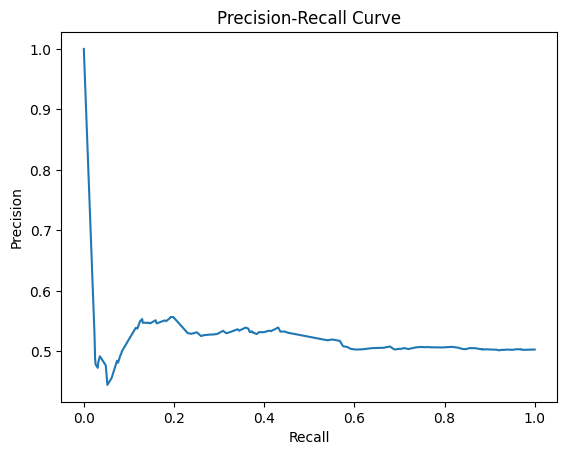

In [317]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1]) 
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [318]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       832
           1       0.52      0.49      0.50       842

    accuracy                           0.51      1674
   macro avg       0.51      0.51      0.51      1674
weighted avg       0.51      0.51      0.51      1674



## Trying RandomForestClassifier

In [321]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier()
rcf.fit(X_train,Y_train)
y_pred=rcf.predict(X_test)

In [322]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.5280764635603346


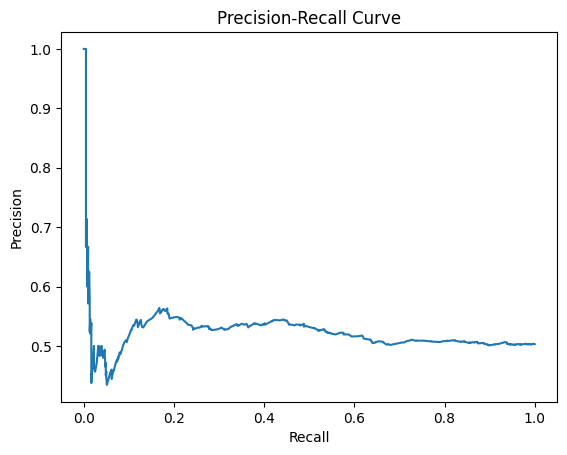

In [323]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, rcf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Potential Improvements
- Trying an automated tool like pandas_profiling to automate EDA
- Trying deep learning models 